In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

import pickle

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

### Loading and cleaning the data set:

In [80]:
heart_data = "../data/clean/resampled_data.csv"
heart_df = pd.read_csv(heart_data)
heart_df = heart_df.drop(columns=['PhysHlth', 'DiffWalk','Education', 'Veggies'], axis=1)
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income
0,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,6.0,8.0
1,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,8.0
2,0.0,1.0,0.0,1.0,32.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,12.0,2.0
3,0.0,0.0,1.0,1.0,29.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,10.0,8.0
4,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,1.0,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,10.0,6.0
47782,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,5.0,15.0,0.0,13.0,4.0
47783,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,8.0,2.0
47784,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,12.0,1.0


### Performing train split: 

In [82]:
target = heart_df['HeartDiseaseorAttack']
features = heart_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### Normalise all columns to be 0-1:

In [84]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm_df = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm_df = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

### Random Forests model: 

In [86]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_norm_df, y_train)
y_pred_rf = rf.predict(x_test_norm_df)

### Gradient Boosting model:

In [88]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=100, random_state=0)  
model.fit(x_train_norm_df, y_train)
y_pred_xgb = model.predict(x_test_norm_df)

### Adaptive Boosting model:

In [90]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(x_train_norm_df, y_train)
y_pred_ab = ab.predict(x_test_norm_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



### Logistic model:

In [92]:
log = LogisticRegression()
log.fit(x_train_norm_df, y_train)
y_pred_test_log = log.predict(x_test_norm_df)

### Ensemble voting model:

In [94]:
# Voting hard

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = RandomForestClassifier(n_estimators=100, random_state=0)
model2 = xgb.XGBClassifier(n_estimators=100, random_state=0)
model3 = LogisticRegression()
model4= DecisionTreeClassifier(random_state=0)
model5= AdaBoostClassifier(n_estimators=50, random_state=0)

ensemble_model = VotingClassifier(estimators=[
    ('rf', model1), ('xgb', model2), ('lr', model3),('dt', model4), 
    ('ab', model5)], voting='hard')

ensemble_model.fit(x_train_norm_df, y_train)
y_pred_ensemble = ensemble_model.predict(x_test_norm_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [96]:
# Voting soft 

ensemble_model2 = VotingClassifier(estimators=[
    ('rf', model1), ('xgb', model2), ('lr', model3),('dt', model4), 
    ('ab', model5)], voting='soft')

ensemble_model2.fit(x_train_norm_df, y_train)
y_pred_ensemble2 = ensemble_model2.predict(x_test_norm_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



### Accuracy of the models:

In [98]:
from sklearn.metrics import accuracy_score, r2_score

print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')
print(f'Accuracy (XGBoost): {accuracy_score(y_test, y_pred_xgb)}')
print(f'Accuracy (AdaBoost): {accuracy_score(y_test, y_pred_ab)}')
print(f'Accuracy (Logistic): {accuracy_score(y_test, y_pred_test_log)}')
print(f'Accuracy (Voting Hard): {accuracy_score(y_test, y_pred_ensemble)}')
print(f'Accuracy (Voting Soft): {accuracy_score(y_test, y_pred_ensemble2)}')

Accuracy (Random Forest): 0.7582130152751622
Accuracy (XGBoost): 0.7729650554509312
Accuracy (AdaBoost): 0.7736974262397991
Accuracy (Logistic): 0.7742205482318477
Accuracy (Voting Hard): 0.7770454069889098
Accuracy (Voting Soft): 0.7553881565181


### Cross validation of the models: 

In [100]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, x_train_norm_df, y_train, cv=5)
print(f'Random Forest Cross-Validation Score: {cv_scores_rf.mean()}')

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(model, x_train_norm_df, y_train, cv=5)
print(f'XGBoost Cross-Validation Score: {cv_scores_xgb.mean()}')

# Cross-validation for AdaBoost
cv_scores_ab = cross_val_score(ab, x_train_norm_df, y_train, cv=5)
print(f'Adaptive Boosting Cross-Validation Score: {cv_scores_ab.mean()}')

# Cross-validation for Logistic
cv_scores_log = cross_val_score(log, x_train_norm_df, y_train, cv=5)
print(f'Logistic Cross-Validation Score: {cv_scores_log.mean()}')

# Cross-validation for Voting hard
cv_scores_voting = cross_val_score(ensemble_model, x_train_norm_df, y_train, cv=5)
print(f'Voting Cross-Validation Score: {cv_scores_voting.mean()}')

# Cross-validation for Voting soft
cv_scores_voting_soft = cross_val_score(ensemble_model2, x_train_norm_df, y_train, cv=5)
print(f'Voting Cross-Validation Score: {cv_scores_voting_soft.mean()}')

Random Forest Cross-Validation Score: 0.7453699759142582
XGBoost Cross-Validation Score: 0.7651461918473211


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight

Adaptive Boosting Cross-Validation Score: 0.7688869629571591
Logistic Cross-Validation Score: 0.7702733361309906


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight

Voting Cross-Validation Score: 0.7693054516508544


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight

Voting Cross-Validation Score: 0.7436174084535667


### Confusion matrix of the models:

In [104]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_ab = confusion_matrix(y_test, y_pred_ab)
cm_log = confusion_matrix(y_test, y_pred_test_log)
cm_voting = confusion_matrix(y_test, y_pred_ensemble)
cm_voting_soft = confusion_matrix(y_test, y_pred_ensemble2)


print(f'Confusion Matrix (Random Forest):\n {cm_rf}')
print(f'Confusion Matrix (XGBoost):\n {cm_xgb}')
print(f'Confusion Matrix (Adaptive Boosting):\n {cm_ab}')
print(f'Confusion Matrix (Logistic):\n {cm_log}')
print(f'Confusion Matrix (Voting Hard):\n {cm_voting}')
print(f'Confusion Matrix (Voting Soft):\n {cm_voting_soft}')

Confusion Matrix (Random Forest):
 [[3498 1294]
 [1017 3749]]
Confusion Matrix (XGBoost):
 [[3520 1272]
 [ 898 3868]]
Confusion Matrix (Adaptive Boosting):
 [[3613 1179]
 [ 984 3782]]
Confusion Matrix (Logistic):
 [[3584 1208]
 [ 950 3816]]
Confusion Matrix (Voting Hard):
 [[3569 1223]
 [ 908 3858]]
Confusion Matrix (Voting Soft):
 [[3548 1244]
 [1094 3672]]


### Code to create the visualizations of the confusion matrix:

In [106]:
import plotly.graph_objects as go
# Create a heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=cm_voting_soft,  # The confusion matrix values
    x=['Class 0', 'Class 1'],  # Predicted classes
    y=['Class 0', 'Class 1'],  # True classes
    colorscale='Blues',  # Color scheme
    colorbar=dict(title='Count'),  # Color bar title
    zmin=0, zmax=np.max(cm_voting_soft),  # Set min and max for color scale
    text=cm_voting_soft,  # Show annotations in each cell
    hovertemplate='True: %{y}<br>Predicted: %{x}<br>Count: %{z}',  # Hover template
))

# Update layout with axis labels and title
fig.update_layout(
    title='Confusion Matrix Ensemble Voting Soft',
    xaxis_title='Predicted',
    yaxis_title='True',
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Class 0', 'Class 1']),
    yaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Class 0', 'Class 1']),
)

# Show the interactive plot (optional)
# fig.show()

# Save the plot as a PNG file (requires Kaleido)
fig.write_image("confusion_matrix_voting_soft.png")

### Receiver Operating Characteristic Area Under the Curve of the models:

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_rf = roc_auc_score(y_test, rf.predict_proba(x_test_norm_df)[:, 1])
auc_xgb = roc_auc_score(y_test, model.predict_proba(x_test_norm_df)[:, 1])
auc_ab = roc_auc_score(y_test, ab.predict_proba(x_test_norm_df)[:, 1])
auc_log = roc_auc_score(y_test, log.predict_proba(x_test_norm_df)[:, 1])

print(f'AUC (Random Forest): {auc_rf}')
print(f'AUC (XGBoost): {auc_xgb}')
print(f'AUC (Adaptive Boosting): {auc_ab}')
print(f'AUC (Logistic): {auc_log}')

AUC (Random Forest): 0.8249708652061731
AUC (XGBoost): 0.8497141821556
AUC (Adaptive Boosting): 0.8517457801399311
AUC (Logistic): 0.8522413212116711


### Visualizations of the feature importances of the models:

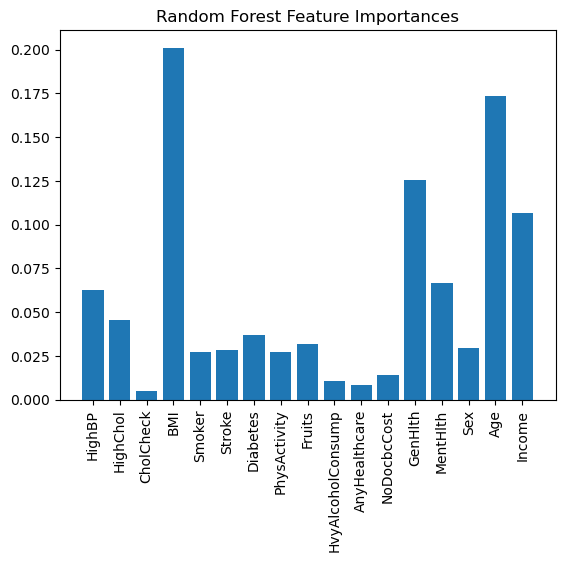

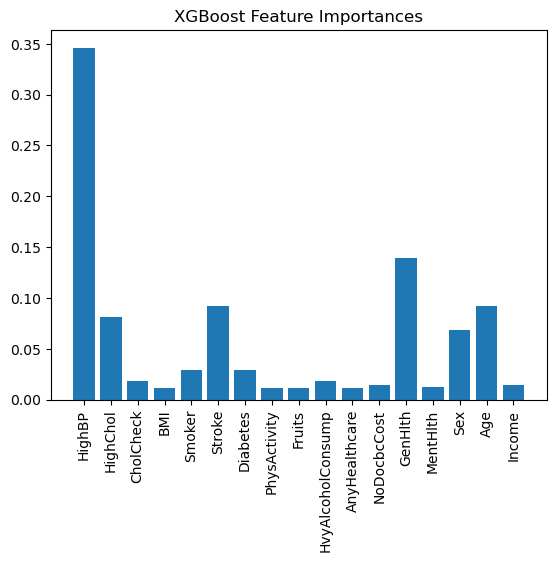

In [110]:
import matplotlib.pyplot as plt

feature_importances_rf = rf.feature_importances_
plt.bar(x_train_norm_df.columns, feature_importances_rf)
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importances')
plt.show()

feature_importances_xgb = model.feature_importances_
plt.bar(x_train_norm_df.columns, feature_importances_xgb)
plt.xticks(rotation=90)
plt.title('XGBoost Feature Importances')
plt.show()

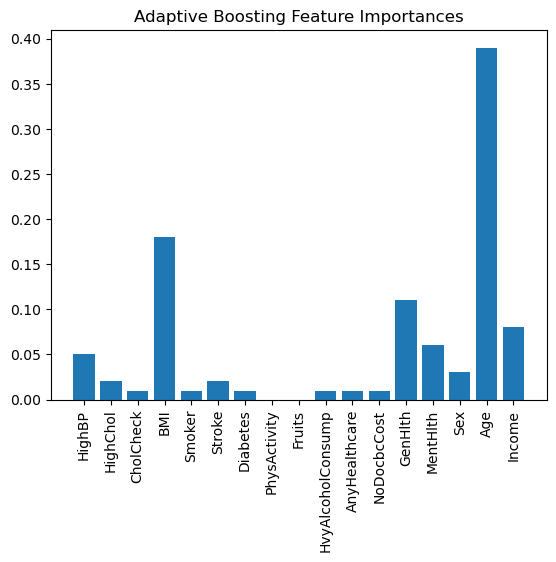

In [40]:
feature_importances_ab = ab.feature_importances_
plt.bar(x_train_norm_df.columns, feature_importances_ab)
plt.xticks(rotation=90)
plt.title('Adaptive Boosting Feature Importances')
plt.show()

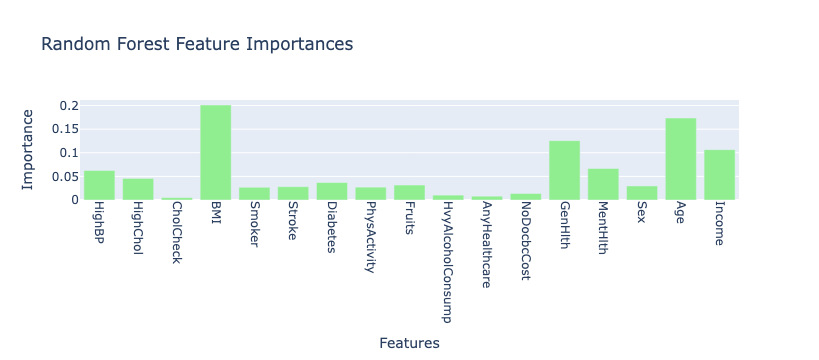

In [112]:
# Random Forest Feature Importances
feature_importances_rf = rf.feature_importances_
fig_rf = go.Figure(data=go.Bar(
    x=x_train_norm_df.columns,
    y=feature_importances_rf,
    marker_color='lightgreen'
))
fig_rf.update_layout(
    title='Random Forest Feature Importances',
    xaxis_title='Features',
    yaxis_title='Importance',
    xaxis_tickangle=90
)

# Show the Random Forest plot
fig_rf.show()

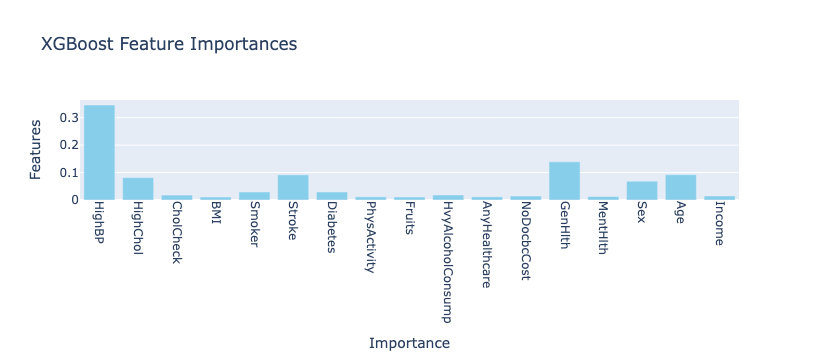

In [116]:
# XGBoost Feature Importances
feature_importances_xgb = model.feature_importances_
fig_xgb = go.Figure(data=go.Bar(
    x=x_train_norm_df.columns,
    y=feature_importances_xgb,
    marker_color='skyblue'
))
fig_xgb.update_layout(
    title='XGBoost Feature Importances',
    xaxis_title='Importance',
    yaxis_title='Features',
    xaxis_tickangle=90
)

fig_xgb.show()

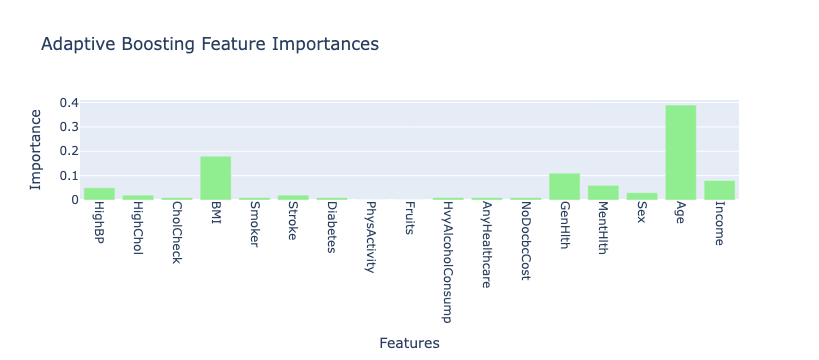

In [118]:
# Adaptive Boosting

feature_importances_ab = ab.feature_importances_
fig_ab = go.Figure(data=go.Bar(
    x=x_train_norm_df.columns,
    y=feature_importances_ab,
    marker_color='lightgreen'
))
fig_ab.update_layout(
    title='Adaptive Boosting Feature Importances',
    xaxis_title='Features',
    yaxis_title='Importance',
    xaxis_tickangle=90
)

fig_ab.show()

### The best model is Gradient Boosting, because slightly outperforms in cross-validation (0.7650) and AUC (0.8473), which are often considered better indicators of overall model performance and generalizability. However, Adaptive Boosting (accuracy= 0.7740) is also a strong contender and could be preferred in certain situations where interpretability or avoiding overfitting is more important.¶

### Reports:

In [120]:
from sklearn.metrics import classification_report
# Random forests
report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n{report_rf}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      4792
         1.0       0.74      0.79      0.76      4766

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558



In [122]:
# Grading boosting
report_xgb = classification_report(y_test, y_pred_xgb)
print(f'Classification Report:\n{report_xgb}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      4792
         1.0       0.75      0.81      0.78      4766

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [124]:
# Adaptive boosting
report_ab = classification_report(y_test, y_pred_ab)
print(f'Classification Report:\n{report_ab}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      4792
         1.0       0.76      0.79      0.78      4766

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [126]:
# Logistic
report_log = classification_report(y_test, y_pred_test_log)
print(f'Classification Report:\n{report_log}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      4792
         1.0       0.76      0.80      0.78      4766

    accuracy                           0.77      9558
   macro avg       0.78      0.77      0.77      9558
weighted avg       0.78      0.77      0.77      9558



In [128]:
# Voting Hard
report_voting = classification_report(y_test, y_pred_ensemble)
print(f'Classification Report:\n{report_voting}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      4792
         1.0       0.76      0.81      0.78      4766

    accuracy                           0.78      9558
   macro avg       0.78      0.78      0.78      9558
weighted avg       0.78      0.78      0.78      9558



In [130]:
# Voting Soft 
report_voting_soft = classification_report(y_test, y_pred_ensemble2)
print(f'Classification Report:\n{report_voting_soft}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      4792
         1.0       0.75      0.77      0.76      4766

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558

